In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
data = pd.read_csv('monthly_sales.csv')

In [3]:
# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

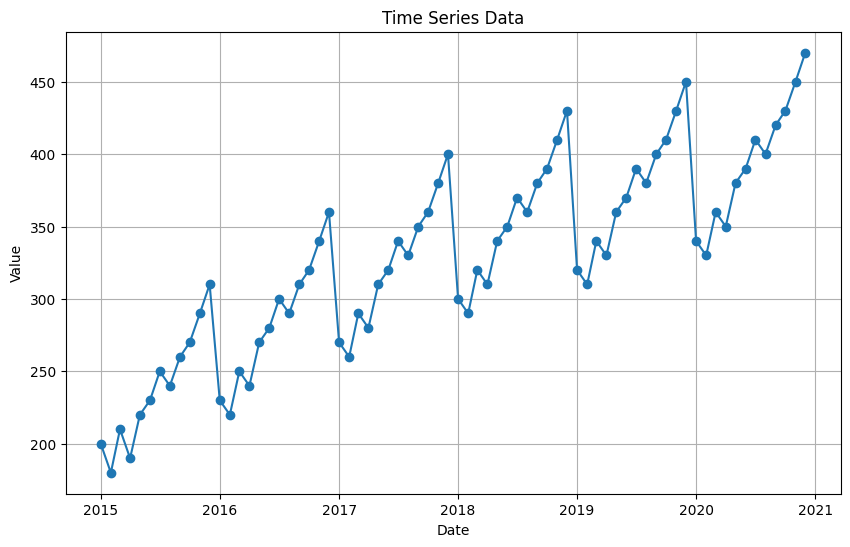

In [4]:
#ARIMA Modeling
#ARIMA (AutoRegressive Integrated Moving Average) is a popular method for forecasting time series data.
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [5]:
# Fit ARIMA model
model = ARIMA(data['value'], order=(1,1,1))  # Example order, you may need to adjust
results = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
# Forecast next 12 periods
forecast = results.forecast(steps=12)

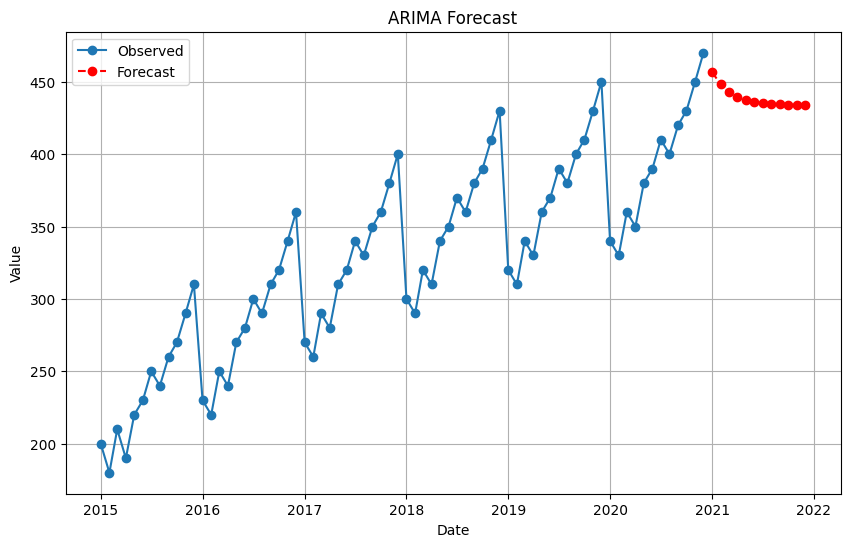

In [7]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-', label='Observed')
plt.plot(forecast.index, forecast.values, marker='o', linestyle='--', color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Print the forecasted values
print("Forecasted Values:")
print(forecast)

Forecasted Values:
2021-01-01    456.526230
2021-02-01    448.060468
2021-03-01    442.741308
2021-04-01    439.399203
2021-05-01    437.299311
2021-06-01    435.979918
2021-07-01    435.150925
2021-08-01    434.630057
2021-09-01    434.302788
2021-10-01    434.097160
2021-11-01    433.967961
2021-12-01    433.886784
Freq: MS, Name: predicted_mean, dtype: float64
